## AV Healthcare Analytics Hackathon

#### Import Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#### Set the size of our seaborn plots

In [2]:
sns.set(rc={'figure.figsize':(20,5)})

#### Get the path of the training and testing dataset

In [3]:
pwd = os.getcwd()
train_path = pwd + "\\train.csv"
test_path = pwd + "\\test.csv"

#### Read the csv files and store in a DataFrame

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

#### Then, we will add a "type" column to both training and testing set, which will be used to separate our dataset after we concat them together to perform similar imputations.

In [5]:
train_df['Type'] = 'Train'
test_df['Type'] = 'Test'

In [6]:
temp_merged_df = pd.concat([train_df,test_df],axis=0)

#### We will use "columns" method to get the column names

In [7]:
temp_merged_df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Type'],
      dtype='object')

#### Now, we will create a Report of our entire dataset using pandas_profiling. It does Exploratory Data Analysis with just a few lines of code. It describes each feature in our dataset and checks for missing values, collinearity etc. and also creates visualizations for better understanding.

In [8]:
import pandas_profiling as pp

report = pp.ProfileReport(temp_merged_df)
report.to_file("DataReport.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

C:\Users\nkr4n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Now, we will remove few columns from our dataset which will have no usecase in our predictive model such as "case_id" and "patientid".

In [9]:
new_columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Type']
merged_df = temp_merged_df[new_columns].copy()

#### Now we will check if our dataset has any missing values or not.

In [10]:
merged_df.isnull().sum()

Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
Type                                      0
dtype: int64

In [11]:
merged_df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Type
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,Train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,Train
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,Train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,Train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,Train


#### Now we will use Simple Imputer from sklearn which replaces the missing values as per the specified strategy, i.e. mean, median, mode, most frequent etc.

In [12]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [13]:
merged_df['Bed Grade'] = imputer.fit_transform(merged_df[['Bed Grade']])
merged_df['City_Code_Patient'] = imputer.fit_transform(merged_df[['City_Code_Patient']])

#### We will one hot encode the following features to represent these categorical features to be more expressive and easier for the ML algorithms to understand and work with.

In [14]:
onehot_columns = ['Hospital_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Ward_Type', 'City_Code_Patient', 'Visitors with Patient', 'Age']

In [15]:
merged_df = pd.get_dummies(data=merged_df,columns=onehot_columns)

#### Now, we will use Label Encoding to encode the below given features as these features are ordinal in nature and hence we want to assign labels to each item with some priorities associated with it.

In [16]:
lencoder = LabelEncoder()

In [17]:
lencode_columns = ['Hospital_type_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Facility_Code', 'Bed Grade', 'Type of Admission', 'Severity of Illness']

In [18]:
merged_df['Hospital_type_code']= lencoder.fit_transform(merged_df['Hospital_type_code'])
merged_df['Available Extra Rooms in Hospital']= lencoder.fit_transform(merged_df['Available Extra Rooms in Hospital'])
merged_df['Department']= lencoder.fit_transform(merged_df['Department'])
merged_df['Ward_Facility_Code']= lencoder.fit_transform(merged_df['Ward_Facility_Code'])
merged_df['Bed Grade']= lencoder.fit_transform(merged_df['Bed Grade'])
merged_df['Type of Admission']= lencoder.fit_transform(merged_df['Type of Admission'])
merged_df['Severity of Illness']= lencoder.fit_transform(merged_df['Severity of Illness'])

#### We will use the "describe()" function to check for the distribution of the data in the DataFrame.

In [19]:
merged_df.describe()

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Admission_Deposit,Hospital_code_1,Hospital_code_2,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
count,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,...,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000
mean,1.256501,3.196059,1.944024,3.286956,1.628215,0.782867,1.374033,4877.434022,0.016378,0.015976,...,0.020066,0.052407,0.128563,0.198509,0.200869,0.152594,0.106739,0.111389,0.024676,0.004187
std,1.532773,1.165920,0.561536,1.689726,0.871929,0.689184,0.768535,1084.982089,0.126924,0.125383,...,0.140227,0.222846,0.334716,0.398878,0.400651,0.359597,0.308781,0.314613,0.155137,0.064569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,4184.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,2.000000,4.000000,2.000000,1.000000,2.000000,4738.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,2.000000,5.000000,2.000000,1.000000,2.000000,5405.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,17.000000,4.000000,5.000000,3.000000,2.000000,2.000000,11920.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### As we can see that the "Admission_Deposit" feature is not having normal distribution of data, so we will plot a boxplot to check for outliers in this particular feature.

<AxesSubplot:xlabel='Admission_Deposit'>

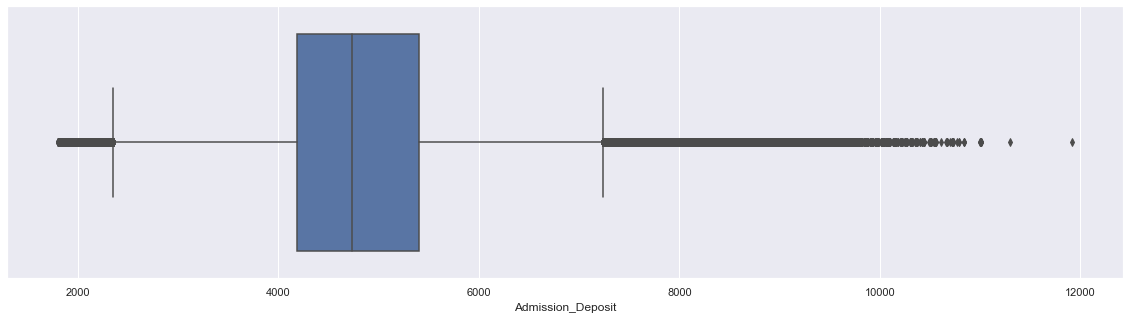

In [20]:
sns.boxplot(x=merged_df['Admission_Deposit'], data=merged_df)

#### Treatment of Outliers by IQR method

In [21]:
def removeOutlier(col):
    sorted(col)
    quant1,quant2 = col.quantile([0.20,0.80])
    IQR = quant2 - quant1
    lowerRange = quant1 - (1.5 * IQR)
    upperRange = quant2 + (1.5 * IQR)
    return lowerRange,upperRange

In [22]:
lowScore,highScore = removeOutlier(merged_df['Admission_Deposit'])
merged_df['Admission_Deposit'] = np.where(merged_df['Admission_Deposit']>highScore,highScore,merged_df['Admission_Deposit'])
merged_df['Admission_Deposit'] = np.where(merged_df['Admission_Deposit']<lowScore,lowScore,merged_df['Admission_Deposit'])

#### Now, as we can notice that the feature "Admission_Deposit" has values which are way higher than the rest of the feature values, which may create issues for the ML algorithm. Hence, we will scale this feature using MinMax Scaler within range of (0,1).

In [23]:
scaler = MinMaxScaler()
merged_df['Admission_Deposit'] = scaler.fit_transform(merged_df[['Admission_Deposit']])

In [24]:
merged_df['Stay'] = merged_df['Stay'].astype('str')

In [25]:
merged_df.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Admission_Deposit,Stay,Type,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,2,3,3,5,1,0,0,0.506348,0-10,Train,...,0,0,0,0,0,1,0,0,0,0
1,2,2,3,5,1,1,0,0.676107,41-50,Train,...,0,0,0,0,0,1,0,0,0,0
2,4,2,1,4,1,1,0,0.479329,31-40,Train,...,0,0,0,0,0,1,0,0,0,0
3,1,2,3,3,1,1,0,0.890625,41-50,Train,...,0,0,0,0,0,1,0,0,0,0
4,1,2,3,3,1,1,0,0.611654,41-50,Train,...,0,0,0,0,0,1,0,0,0,0


#### Now, we will split our dataset into training and testing set using the flag that we had set earlier.

In [26]:
train = merged_df[merged_df['Type'] == 'Train']
test = merged_df[merged_df['Type'] == 'Test']

In [27]:
y = train['Stay']
X = train.drop(columns=['Stay','Type'])

#### Now, we will use CatBoostClassifier for this problem

In [28]:
from catboost import CatBoostClassifier

In [29]:
dmodel = CatBoostClassifier()
dmodel.fit(X, y)

Learning rate set to 0.106164
0:	learn: 2.2238070	total: 726ms	remaining: 12m 5s
1:	learn: 2.1120798	total: 1.17s	remaining: 9m 42s
2:	learn: 2.0238798	total: 1.6s	remaining: 8m 52s
3:	learn: 1.9570892	total: 2.05s	remaining: 8m 29s
4:	learn: 1.9020252	total: 2.48s	remaining: 8m 13s
5:	learn: 1.8569438	total: 2.91s	remaining: 8m 2s
6:	learn: 1.8205624	total: 3.37s	remaining: 7m 57s
7:	learn: 1.7912304	total: 3.8s	remaining: 7m 51s
8:	learn: 1.7652332	total: 4.24s	remaining: 7m 46s
9:	learn: 1.7441399	total: 4.67s	remaining: 7m 42s
10:	learn: 1.7257315	total: 5.11s	remaining: 7m 39s
11:	learn: 1.7091019	total: 5.54s	remaining: 7m 36s
12:	learn: 1.6954927	total: 5.97s	remaining: 7m 33s
13:	learn: 1.6839591	total: 6.4s	remaining: 7m 30s
14:	learn: 1.6737300	total: 6.83s	remaining: 7m 28s
15:	learn: 1.6653915	total: 7.31s	remaining: 7m 29s
16:	learn: 1.6568157	total: 7.74s	remaining: 7m 27s
17:	learn: 1.6478584	total: 8.18s	remaining: 7m 26s
18:	learn: 1.6416584	total: 8.61s	remaining: 7m 

158:	learn: 1.5181569	total: 1m 10s	remaining: 6m 12s
159:	learn: 1.5178579	total: 1m 10s	remaining: 6m 11s
160:	learn: 1.5177560	total: 1m 11s	remaining: 6m 11s
161:	learn: 1.5173265	total: 1m 11s	remaining: 6m 11s
162:	learn: 1.5172207	total: 1m 12s	remaining: 6m 11s
163:	learn: 1.5171332	total: 1m 12s	remaining: 6m 10s
164:	learn: 1.5169593	total: 1m 13s	remaining: 6m 10s
165:	learn: 1.5167312	total: 1m 13s	remaining: 6m 9s
166:	learn: 1.5164692	total: 1m 14s	remaining: 6m 9s
167:	learn: 1.5162749	total: 1m 14s	remaining: 6m 9s
168:	learn: 1.5159206	total: 1m 14s	remaining: 6m 8s
169:	learn: 1.5155835	total: 1m 15s	remaining: 6m 8s
170:	learn: 1.5152785	total: 1m 15s	remaining: 6m 7s
171:	learn: 1.5150983	total: 1m 16s	remaining: 6m 7s
172:	learn: 1.5149162	total: 1m 16s	remaining: 6m 6s
173:	learn: 1.5147530	total: 1m 17s	remaining: 6m 7s
174:	learn: 1.5145146	total: 1m 17s	remaining: 6m 6s
175:	learn: 1.5141987	total: 1m 18s	remaining: 6m 6s
176:	learn: 1.5140624	total: 1m 18s	rem

311:	learn: 1.4919904	total: 2m 23s	remaining: 5m 16s
312:	learn: 1.4919136	total: 2m 24s	remaining: 5m 16s
313:	learn: 1.4918421	total: 2m 24s	remaining: 5m 15s
314:	learn: 1.4916662	total: 2m 24s	remaining: 5m 15s
315:	learn: 1.4914783	total: 2m 25s	remaining: 5m 14s
316:	learn: 1.4912938	total: 2m 25s	remaining: 5m 14s
317:	learn: 1.4911732	total: 2m 26s	remaining: 5m 13s
318:	learn: 1.4910255	total: 2m 26s	remaining: 5m 13s
319:	learn: 1.4908848	total: 2m 27s	remaining: 5m 12s
320:	learn: 1.4906590	total: 2m 27s	remaining: 5m 12s
321:	learn: 1.4905936	total: 2m 28s	remaining: 5m 11s
322:	learn: 1.4904137	total: 2m 28s	remaining: 5m 11s
323:	learn: 1.4902692	total: 2m 28s	remaining: 5m 10s
324:	learn: 1.4901259	total: 2m 29s	remaining: 5m 10s
325:	learn: 1.4900140	total: 2m 29s	remaining: 5m 9s
326:	learn: 1.4899148	total: 2m 30s	remaining: 5m 9s
327:	learn: 1.4898123	total: 2m 30s	remaining: 5m 8s
328:	learn: 1.4896479	total: 2m 31s	remaining: 5m 8s
329:	learn: 1.4894948	total: 2m 

464:	learn: 1.4748915	total: 3m 33s	remaining: 4m 5s
465:	learn: 1.4747896	total: 3m 33s	remaining: 4m 4s
466:	learn: 1.4747061	total: 3m 33s	remaining: 4m 4s
467:	learn: 1.4746520	total: 3m 34s	remaining: 4m 3s
468:	learn: 1.4745618	total: 3m 34s	remaining: 4m 3s
469:	learn: 1.4744409	total: 3m 35s	remaining: 4m 2s
470:	learn: 1.4743745	total: 3m 35s	remaining: 4m 2s
471:	learn: 1.4742605	total: 3m 36s	remaining: 4m 2s
472:	learn: 1.4741306	total: 3m 36s	remaining: 4m 1s
473:	learn: 1.4740534	total: 3m 37s	remaining: 4m 1s
474:	learn: 1.4740015	total: 3m 37s	remaining: 4m
475:	learn: 1.4739225	total: 3m 38s	remaining: 4m
476:	learn: 1.4736968	total: 3m 38s	remaining: 3m 59s
477:	learn: 1.4735971	total: 3m 39s	remaining: 3m 59s
478:	learn: 1.4735095	total: 3m 39s	remaining: 3m 58s
479:	learn: 1.4733978	total: 3m 39s	remaining: 3m 58s
480:	learn: 1.4732883	total: 3m 40s	remaining: 3m 57s
481:	learn: 1.4731884	total: 3m 40s	remaining: 3m 57s
482:	learn: 1.4729818	total: 3m 41s	remaining:

618:	learn: 1.4614854	total: 4m 39s	remaining: 2m 52s
619:	learn: 1.4614404	total: 4m 40s	remaining: 2m 51s
620:	learn: 1.4613746	total: 4m 40s	remaining: 2m 51s
621:	learn: 1.4613113	total: 4m 41s	remaining: 2m 50s
622:	learn: 1.4611822	total: 4m 41s	remaining: 2m 50s
623:	learn: 1.4610930	total: 4m 42s	remaining: 2m 49s
624:	learn: 1.4609779	total: 4m 42s	remaining: 2m 49s
625:	learn: 1.4609488	total: 4m 42s	remaining: 2m 49s
626:	learn: 1.4608789	total: 4m 43s	remaining: 2m 48s
627:	learn: 1.4608009	total: 4m 43s	remaining: 2m 48s
628:	learn: 1.4607244	total: 4m 44s	remaining: 2m 47s
629:	learn: 1.4606762	total: 4m 44s	remaining: 2m 47s
630:	learn: 1.4606058	total: 4m 45s	remaining: 2m 46s
631:	learn: 1.4605055	total: 4m 45s	remaining: 2m 46s
632:	learn: 1.4603665	total: 4m 45s	remaining: 2m 45s
633:	learn: 1.4603234	total: 4m 46s	remaining: 2m 45s
634:	learn: 1.4602725	total: 4m 46s	remaining: 2m 44s
635:	learn: 1.4601956	total: 4m 47s	remaining: 2m 44s
636:	learn: 1.4600571	total:

771:	learn: 1.4503769	total: 5m 46s	remaining: 1m 42s
772:	learn: 1.4502914	total: 5m 46s	remaining: 1m 41s
773:	learn: 1.4501738	total: 5m 47s	remaining: 1m 41s
774:	learn: 1.4500918	total: 5m 47s	remaining: 1m 40s
775:	learn: 1.4500045	total: 5m 48s	remaining: 1m 40s
776:	learn: 1.4499127	total: 5m 48s	remaining: 1m 40s
777:	learn: 1.4498779	total: 5m 49s	remaining: 1m 39s
778:	learn: 1.4497852	total: 5m 49s	remaining: 1m 39s
779:	learn: 1.4496715	total: 5m 49s	remaining: 1m 38s
780:	learn: 1.4495989	total: 5m 50s	remaining: 1m 38s
781:	learn: 1.4495628	total: 5m 50s	remaining: 1m 37s
782:	learn: 1.4494055	total: 5m 51s	remaining: 1m 37s
783:	learn: 1.4493627	total: 5m 51s	remaining: 1m 36s
784:	learn: 1.4493189	total: 5m 52s	remaining: 1m 36s
785:	learn: 1.4492949	total: 5m 52s	remaining: 1m 36s
786:	learn: 1.4492268	total: 5m 53s	remaining: 1m 35s
787:	learn: 1.4491535	total: 5m 53s	remaining: 1m 35s
788:	learn: 1.4490638	total: 5m 53s	remaining: 1m 34s
789:	learn: 1.4489986	total:

926:	learn: 1.4395114	total: 6m 52s	remaining: 32.5s
927:	learn: 1.4394763	total: 6m 53s	remaining: 32.1s
928:	learn: 1.4394510	total: 6m 53s	remaining: 31.6s
929:	learn: 1.4394002	total: 6m 53s	remaining: 31.2s
930:	learn: 1.4393613	total: 6m 54s	remaining: 30.7s
931:	learn: 1.4393092	total: 6m 54s	remaining: 30.3s
932:	learn: 1.4392099	total: 6m 55s	remaining: 29.8s
933:	learn: 1.4391285	total: 6m 55s	remaining: 29.4s
934:	learn: 1.4390454	total: 6m 56s	remaining: 28.9s
935:	learn: 1.4389560	total: 6m 56s	remaining: 28.5s
936:	learn: 1.4388838	total: 6m 56s	remaining: 28s
937:	learn: 1.4388467	total: 6m 57s	remaining: 27.6s
938:	learn: 1.4387893	total: 6m 57s	remaining: 27.1s
939:	learn: 1.4387511	total: 6m 58s	remaining: 26.7s
940:	learn: 1.4386704	total: 6m 58s	remaining: 26.3s
941:	learn: 1.4386222	total: 6m 59s	remaining: 25.8s
942:	learn: 1.4385471	total: 6m 59s	remaining: 25.4s
943:	learn: 1.4384764	total: 6m 59s	remaining: 24.9s
944:	learn: 1.4384403	total: 7m	remaining: 24.5s

In [30]:
print("Accuracy of Model = {:.2f} %".format(dmodel.score(X,y) * 100))

Accuracy of Model = 45.06 %


In [31]:
yt = test['Stay']
Xt = test.drop(columns=['Stay','Type'])

In [32]:
y_pred = dmodel.predict(Xt)

In [33]:
outputdf = pd.DataFrame(test_df['case_id'])
outputdf['Stay'] = y_pred

#### Store the output in "final_submission.csv" file

In [34]:
outputdf.to_csv("final_submission.csv",index=False)

### The END